# CS251 ARTIFICIAL INTELLIGENCE
## ASIGNMENT 04
### *MUHAMMAD HAMZA MOTIWALA*
### *2022380*

#### IMPORTING THE LIBRARIES

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping

#### LOADING DATASET AND PREPROCESSING

In [7]:
# Step 1: Load Data
data = pd.read_csv("forestfires.csv")

# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Convert burned area into categories (e.g., small: 0, large: 1)
data['category'] = np.where(data['area'] <= 5, 0, 1)

# Split data into features and target variable
X = data.drop(columns=['area', 'category'])
y = data['category']

#### SPLITTING INTO TRAINING AND TESTING SETS

In [8]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### DEFINING THE SCALE FEATURES 

In [9]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### DEFINING LSTM MODEL ARCHITECTURE

In [10]:
from tensorflow.keras.layers import Input

# Define input shape
input_shape = (X_train_scaled.shape[1], 1)

# LSTM Model
model = Sequential([
    Input(shape=input_shape),
    LSTM(128, return_sequences=True),
    Dropout(0.2),
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

#### COMPILING AND TRAINING THE  MODEL

In [11]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Reshaping data for LSTM 
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Training with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, verbose=1, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.5910 - loss: 0.6794 - val_accuracy: 0.7470 - val_loss: 0.5772
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7275 - loss: 0.5962 - val_accuracy: 0.7470 - val_loss: 0.5973
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6942 - loss: 0.6257 - val_accuracy: 0.7470 - val_loss: 0.5761
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6818 - loss: 0.6246 - val_accuracy: 0.7470 - val_loss: 0.5653
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6688 - loss: 0.6337 - val_accuracy: 0.7470 - val_loss: 0.5719
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6752 - loss: 0.6274 - val_accuracy: 0.7470 - val_loss: 0.5603
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7170 - loss: 0.5865 - val_accuracy: 0.7470 - val_loss: 0.5671
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6678 - loss: 0.6191 - val_accuracy: 0

#### EVALUATING OUR MODEL

In [17]:
# Evaluating the model
y_pred_prob = model.predict(X_test_reshaped)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Accuracy: 0.9807692307692307


#### CLASSIFICATION REPORT

In [15]:
from sklearn.metrics import classification_report

class_report = classification_report(y_test, y_pred, target_names=['Small Fire', 'Large Fire'])
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

  Small Fire       0.97      1.00      0.99        74
  Large Fire       1.00      0.93      0.97        30

    accuracy                           0.98       104
   macro avg       0.99      0.97      0.98       104
weighted avg       0.98      0.98      0.98       104



## VISUALIZATIONS


#### DIFFERENT FEATURES OF THE DATASET

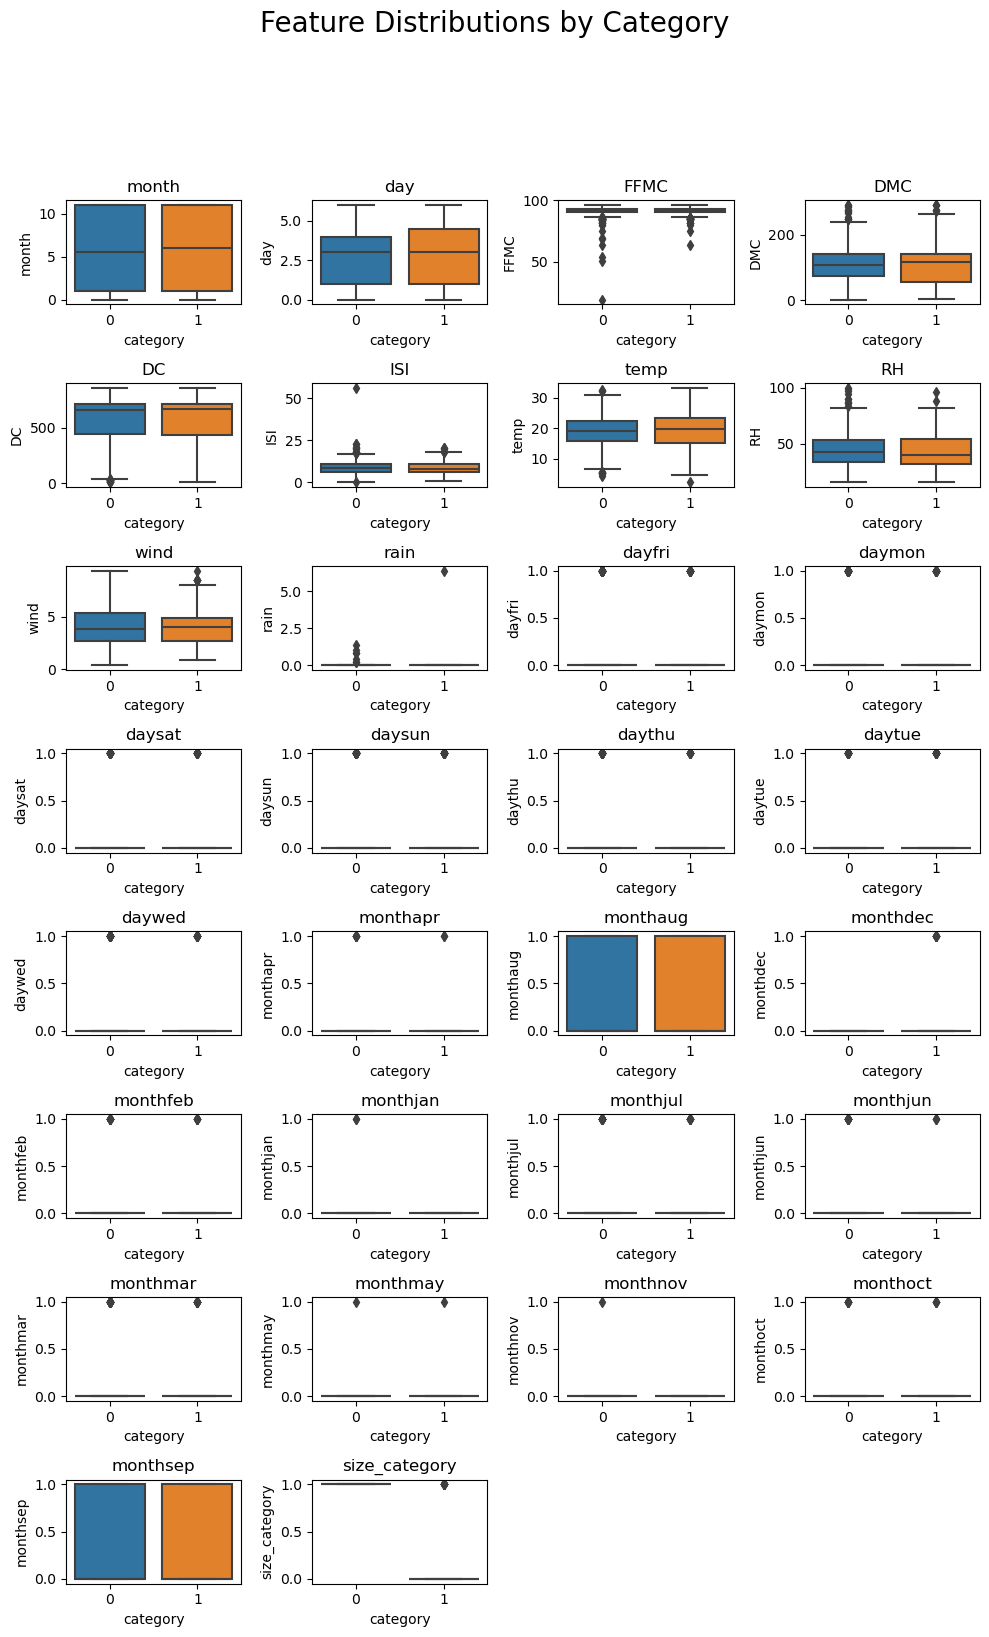

In [26]:
num_features = len(X.columns)
num_rows = (num_features // 4) + (num_features % 4 > 0)  # Calculate the number of rows required
plt.figure(figsize=(10, 2 * num_rows))  # Adjust the figure size accordingly

for i, column in enumerate(X.columns):
    plt.subplot(num_rows, 4, i+1)  # Adjust the number of columns dynamically
    sns.boxplot(x=y, y=data[column])
    plt.title(column)

plt.suptitle('Feature Distributions by Category', x=0.5, y=1.02, fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


#### LOSS vs ACCURACY GRAPHS

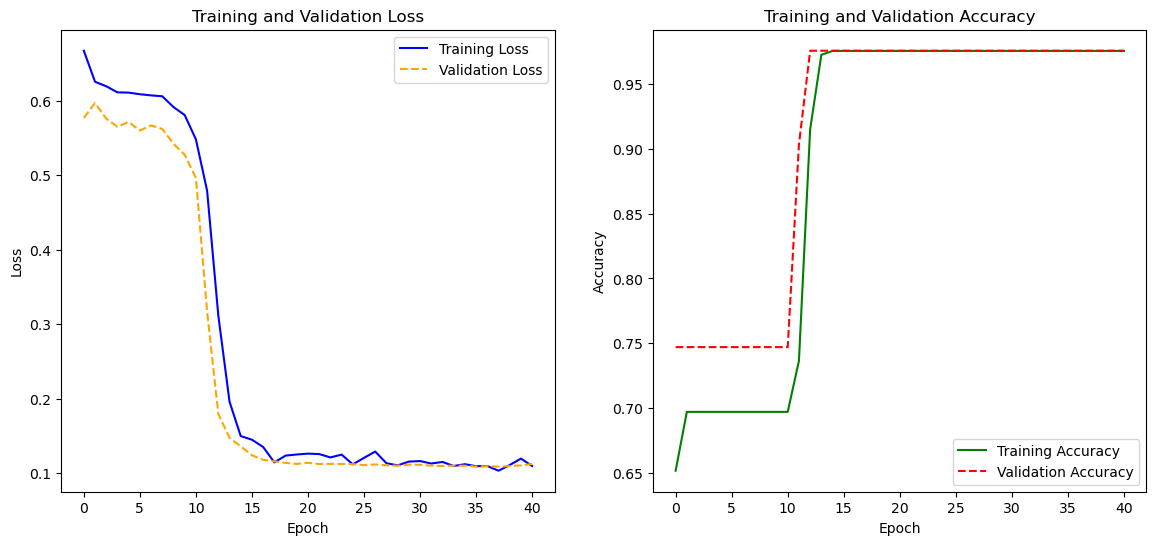

In [18]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue', linestyle='-')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange', linestyle='--')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='green', linestyle='-')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red', linestyle='--')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


#### CONFUSION MATRIX

Confusion Matrix:
[[74  0]
 [ 2 28]]


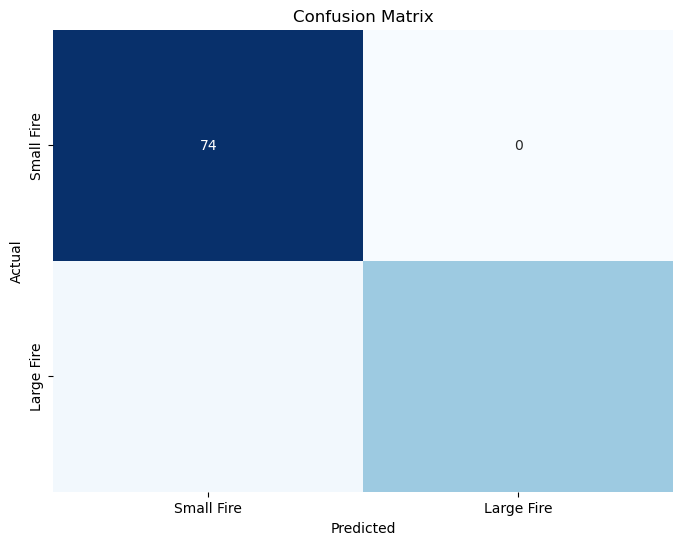

In [19]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Small Fire', 'Large Fire'], 
            yticklabels=['Small Fire', 'Large Fire'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


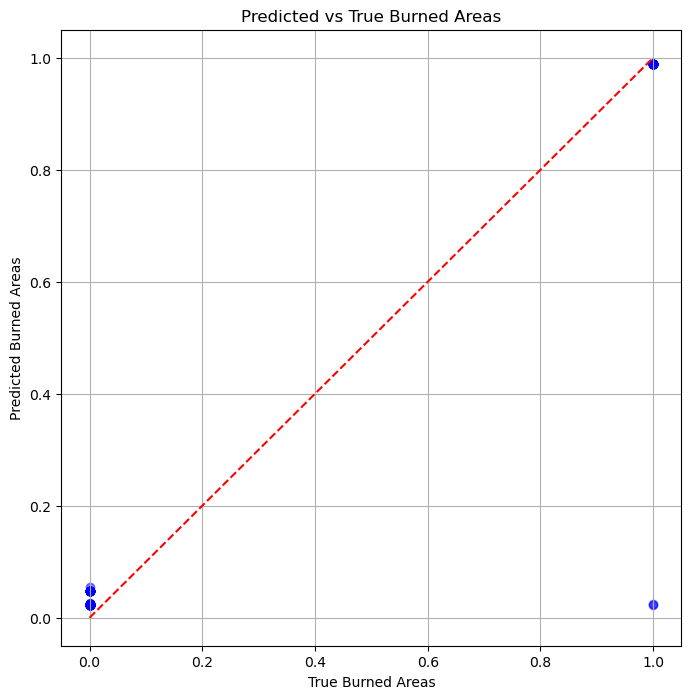

In [28]:
#Getting predicted areas
y_pred_area = model.predict(X_test_reshaped).flatten()

plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_area, color='blue', alpha=0.5)
plt.plot([0, max(max(y_test), max(y_pred_area))], [0, max(max(y_test), max(y_pred_area))], color='red', linestyle='--')
plt.title('Predicted vs True Burned Areas')
plt.xlabel('True Burned Areas')
plt.ylabel('Predicted Burned Areas')
plt.grid(True)
plt.show()

#### THANKYOU!!